In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
#path = "lstm-out/NO-SCALE-1-5-100-120-60-30-0.01-1.csv"
def readFile(path):
    df = pd.read_csv("lstm-out/"+path, delimiter=',', index_col=0, parse_dates=True)
    return df

In [59]:
def getMean(df, m="MAE"):
    #print(df[m])
    print(df[m].mean())
    
def getMeanNaive(df, m="NAIVE_MAPE"):
    columns = ['MAE', 'RMSE', 'MAPE', 'MEAN_MAE', 'MEAN_RMSE', 'MEAN_MAPE', 'NAIVE_MAE', 'NAIVE_RMSE', 'NAIVE_MAE']
    df = df.set_axis(['MAE', 'RMSE', 'MAPE', 'MEAN_MAE', 'MEAN_RMSE', 'MEAN_MAPE', 'NAIVE_MAE', 'NAIVE_RMSE', 'NAIVE_MAPE'], axis=1, inplace=False)
    print(df[m].mean())
    

In [163]:
def graph(df):
    columns = ['MAE', 'RMSE', 'MAPE', 'MEAN_MAE', 'MEAN_RMSE', 'MEAN_MAPE', 'NAIVE_MAE', 'NAIVE_RMSE', 'NAIVE_MAE']
    df = df.set_axis(['MAE', 'RMSE', 'MAPE', 'MEAN_MAE', 'MEAN_RMSE', 'MEAN_MAPE', 'NAIVE_MAE', 'NAIVE_RMSE', 'NAIVE_MAPE'], axis=1, inplace=False)
    #print(df)
    figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    X = np.arange(50)
    X = X[::-1]

    states = list(df.index) 
    #plt.bar(X, df.iloc[:, 0], color='blue', width = 0.25, tick_label=states)
    #plt.bar(X+0.25, df.iloc[:, 4], color='red', width = 0.25, tick_label=states)
    handle1 = plt.bar(X, df['MAPE'], color='blue', width = 0.25, tick_label=states, label="LSTM")
    #plt.bar(X+0.5, df['NAIVE_MAE'], color='green', width = 0.25, tick_label=states)
    handle2 = plt.bar(X+0.25, df['MEAN_MAPE'], color='red', width = 0.25, tick_label=states, label="Naive Mean")
    plt.legend(handles = [handle1, handle2])
    plt.ylabel("Mean Absolute Error")
    plt.xlabel("Time Series")
    plt.savefig("lstm-out/concur_perf", dpi=200, bbox_inches='tight')

    plt.show()

In [172]:
def arima_graph(df):
    figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    X = np.arange(50)
    X = X[::-1]

    states = list(df.index) 
    #plt.bar(X, df.iloc[:, 0], color='blue', width = 0.25, tick_label=states)
    #plt.bar(X+0.25, df.iloc[:, 4], color='red', width = 0.25, tick_label=states)
    handle1 = plt.bar(X, df['3pt MAE'], color='blue', width = 0.25, tick_label=states, label="ARIMA")
    #plt.bar(X+0.5, df['NAIVE_MAE'], color='green', width = 0.25, tick_label=states)
    handle2 = plt.bar(X+0.25, df['3pt MEAN MAE'], color='red', width = 0.25, tick_label=states, label="Naive Mean")
    plt.legend(handles = [handle1, handle2])
    plt.ylabel("Mean Absolute Error")
    plt.xlabel("Time Series")
    plt.savefig("lstm-out/arima_short", dpi=200, bbox_inches='tight')

    plt.show()

In [60]:
print("0 dropout")
paths = []
# number of hidden parameters
paths.append("1-2-100-6-3-30-0.01-0.csv")
paths.append("1-5-100-6-3-30-0.01-0.csv")
paths.append("1-10-100-6-3-30-0.01-0.csv")
paths.append("1-20-100-6-3-30-0.01-0.csv")

for path in paths:
    df = readFile(path)
    getMean(df)

print("0.5 dropout")
paths = []
# number of hidden parameters
paths.append("1-2-100-6-3-30-0.01-0.5.csv")
paths.append("1-5-100-6-3-30-0.01-0.5.csv")
paths.append("1-10-100-6-3-30-0.01-0.5.csv")
paths.append("1-20-100-6-3-30-0.01-0.5.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
print("1 dropout")
paths = []
# number of hidden parameters
paths.append("1-2-100-6-3-30-0.01-1.csv")
paths.append("1-5-100-6-3-30-0.01-1.csv")
paths.append("1-10-100-6-3-30-0.01-1.csv")
paths.append("1-20-100-6-3-30-0.01-1.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
#graph(readFile(paths[0]))
#getMeanNaive(readFile(paths[0]))
print("naive errors")
getMeanNaive(readFile(paths[0]), "NAIVE_MAE")
getMeanNaive(readFile(paths[0]), "MEAN_MAE")
getMeanNaive(readFile(paths[0]), "NAIVE_MAPE")
getMeanNaive(readFile(paths[0]), "MEAN_MAPE")
# performance is best with 5-10 hidden parameters and lower drop out

0 dropout
4.298370980247335
3.6014706240337695
3.4827134789636953
3.503821593667475
0.5 dropout
4.135488849254573
3.543675341855778
3.4994457377253614
3.4815771798092636
1 dropout
4.333278150055787
3.552305426568229
3.495370882001099
3.4967572616165516
naive errors
16.747641391013374
16.776559536252197
0.9026623904314729
0.9370662754748225


In [61]:
# Same but 2 layers
print("0 dropout")
paths = []
# number of hidden parameters
paths.append("2-2-100-6-3-30-0.01-0.csv")
paths.append("2-5-100-6-3-30-0.01-0.csv")
paths.append("2-10-100-6-3-30-0.01-0.csv")
paths.append("2-20-100-6-3-30-0.01-0.csv")

for path in paths:
    df = readFile(path)
    getMean(df)

print("0.5 dropout")
paths = []
# number of hidden parameters
paths.append("2-2-100-6-3-30-0.01-0.5.csv")
paths.append("2-5-100-6-3-30-0.01-0.5.csv")
paths.append("2-10-100-6-3-30-0.01-0.5.csv")
paths.append("2-20-100-6-3-30-0.01-0.5.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
print("1 dropout")
paths = []
# number of hidden parameters
paths.append("2-2-100-6-3-30-0.01-1.csv")
paths.append("2-5-100-6-3-30-0.01-1.csv")
paths.append("2-10-100-6-3-30-0.01-1.csv")
paths.append("2-20-100-6-3-30-0.01-1.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
#graph(readFile(paths[0]))

# performance is best with 5-10 hidden parameters and lower drop out

0 dropout
4.608110191116682
3.6469025541666547
3.4768592374882705
3.450118531609922
0.5 dropout
5.253860691902162
3.853761327669385
3.6318326877341316
3.6928452403052163
1 dropout
11.050875113630616
11.035655229410313
11.123989696525506
11.060788659632301


In [63]:
# Same but 3 layers
print("0 dropout")
paths = []
# number of hidden parameters
paths.append("3-2-100-6-3-30-0.01-0.csv")
paths.append("3-5-100-6-3-30-0.01-0.csv")
paths.append("3-10-100-6-3-30-0.01-0.csv")
paths.append("3-20-100-6-3-30-0.01-0.csv")

for path in paths:
    df = readFile(path)
    getMean(df)

print("0.5 dropout")
paths = []
# number of hidden parameters
paths.append("3-2-100-6-3-30-0.01-0.5.csv")
paths.append("3-5-100-6-3-30-0.01-0.5.csv")
paths.append("3-10-100-6-3-30-0.01-0.5.csv")
paths.append("3-20-100-6-3-30-0.01-0.5.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
print("1 dropout")
paths = []
# number of hidden parameters
paths.append("3-2-100-6-3-30-0.01-1.csv")
paths.append("3-5-100-6-3-30-0.01-1.csv")
paths.append("3-10-100-6-3-30-0.01-1.csv")
paths.append("3-20-100-6-3-30-0.01-1.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
#graph(readFile(paths[0]))

# performance is best with 5-10 hidden parameters and lower drop out

0 dropout
6.362222937212054
3.7338905942370957
3.63152434640155
3.584895649880234
0.5 dropout
6.833871854175323
4.099741614601321
3.8222641841121043
3.696953729904467
1 dropout
11.056231356922174
11.1669083372883
11.08291939910325
11.067943990858065


In [179]:
# Long Term Analysis
print("1 layer")
paths = []
paths.append("1-5-100-432-216-30-0.01-0.csv")
paths.append("1-10-100-432-216-30-0.01-0.csv")
paths.append("1-20-100-432-216-30-0.01-0.csv")
paths.append("1-30-100-432-216-30-0.01-0.csv")

for path in paths:
    df = readFile(path)
    getMean(df)

print("2 layers")
paths = []
paths.append("2-5-100-432-216-30-0.01-0.csv")
paths.append("2-10-100-432-216-30-0.01-0.csv")
paths.append("2-20-100-432-216-30-0.01-0.csv")
paths.append("2-30-100-432-216-30-0.01-0.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
print("3 layers")
paths = []
paths.append("3-5-100-432-216-30-0.01-0.csv")
paths.append("3-10-100-432-216-30-0.01-0.csv")
paths.append("3-20-100-432-216-30-0.01-0.csv")
paths.append("3-30-100-432-216-30-0.01-0.csv")


for path in paths:
    df = readFile(path)
    getMean(df)
    
#graph(readFile(paths[0]))

# performance is best with 5-10 hidden parameters and lower drop out

1 layer
11.707901753223203
11.094179024933958
10.848624087604676
10.907888719614935
2 layers
11.816644308605884
11.060142354802803
10.817485659856372
11.123639579348753
3 layers
11.561774247263747
11.498964251169003
11.25136782861082
11.05480728485285


In [ ]:
# no resample
paths = []
paths.append("NO-SCALE-1-5-100-120-60-30-0.01-1.csv")
paths.append("NO-SCALE-1-10-100-120-60-30-0.01-1.csv")
paths.append("NO-SCALE-1-20-100-120-60-30-0.01-1.csv")
paths.append("NO-SCALE-2-5-100-120-60-30-0.01-1.csv")

for path in paths:
    df = readFile(path)
    getMean(df)
    
print("naive perf")
for path in paths:
    df = readFile(path)
    getMeanNaive(df)

In [178]:
#df = readFile("3-20-100-532-216-40-0.01-0.1.csv")
#df = readFile("trash/NO-SCALE-1-10-100-120-60-30-0.01-1.csv")
df = readFile("concur-2-10-100-6-3-50-0.01-0.5.csv")
#df = readFile("4-20-100-6-3-30-0.01-0.csv")
#df = readFile("2-20-100-6-3-30-0.01-0.csv")
#print(df)
#graph(df)
#print(df)
print(getMean(df, m="MAE"))

print(count)
print(df['MAE'].mean())
print(df['MAPE'].mean())

10.611669625162085
None
0
10.611669625162085
1.784377328956223


5.3790731785813675
6.536975833333335
8.641332964665912
12.512775013704818


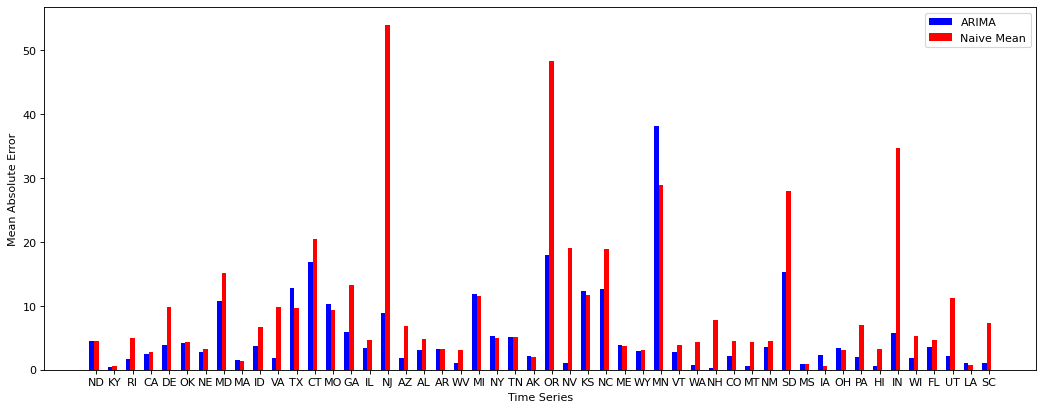

In [173]:
# arima analysis
df = pd.read_csv("arima_results.csv", delimiter=',', index_col=0, parse_dates=True)

#print(df)
print(df['3pt MAE'].mean())
print(df['3pt NAIVE MAE'].mean())
print(df['MAE'].mean())
print(df['NAIVE_MAE'].mean())
arima_graph(df)